## 데이터 및 결측치 확인
### 라이브러리 및 파일 불러오기

In [78]:
# 필요한 라이브러리 불러오기
# 데이터 핸들링을 위한 라이브러리
import numpy as np
import pandas as pd

# 데이터 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlib style 설정
plt.style.use('seaborn')

# 사진 파일 불러오기
!pip install IPython
from IPython.display import Image

# 문법 변경에 의한 경고를 무시
import warnings

warnings.filterwarnings('ignore')

# matplotlib 시각화 결과를 jupyter notebook에서 바로 볼 수 있게 해주는 command
%matplotlib inline


In [3]:
#데이터 불러오기
data = pd.read_csv('./train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 결측치 확인

In [6]:
# 결측값 확인. 이 결측치는 무조건 제거를 해줘야함
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'number6')

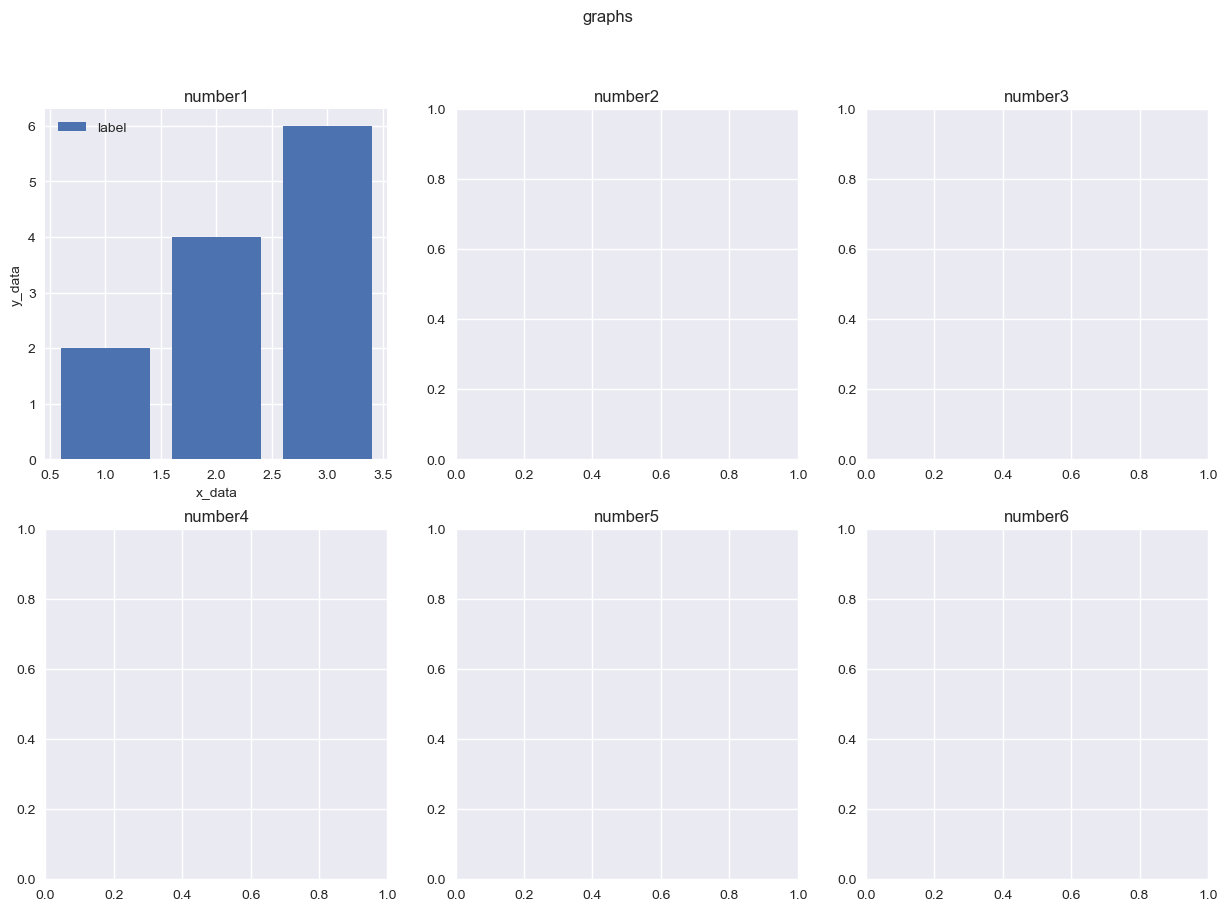

In [7]:
# 데이터 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# 리스트로 표현
x = [1,2,3]
y = [2,4,6]
# figsize: 도화지 크기를 몇으로 할 것인지. fig는 그림의 이름. ax는 각각 지정 가능한 것
fig, ax = plt.subplots(2,3, figsize=(15,10))
fig.suptitle('graphs')

#Plt.subplot(m,n,i) m행, n열, i번째

#첫번째 그래프
ax[0,0].bar(x,y, label='label')
ax[0,0].set_title('number1')
#범례 설정
ax[0,0].legend()
ax[0,0].set(xlabel='x_data',ylabel='y_data')

#두번쨰 그래프
ax[0,1].set_title('number2')

#세번째 그래프
ax[0,2].set_title('number3')

#네번째 그래프
ax[1,0].set_title('number4')

#다섯번째 그래프
ax[1,1].set_title('number5')

#여섯번째 그래프
ax[1,2].set_title('number6')

<Figure size 800x550 with 0 Axes>

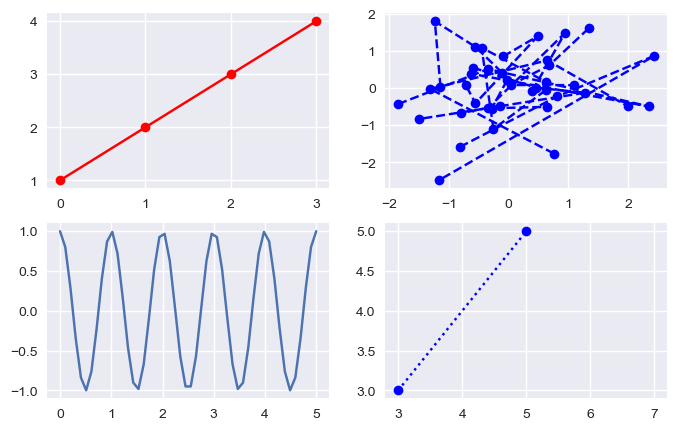

In [8]:
fig = plt.figure()
fig.suptitle('figure sample plots')

fig, ax_lst = plt.subplots(2, 2, figsize=(8,5))

#시각화 스타일 설정

ax_lst[0][0].plot([1,2,3,4], 'ro-')
ax_lst[0][1].plot(np.random.randn(4, 10), np.random.randn(4,10), 'bo--')
ax_lst[1][0].plot(np.linspace(0.0, 5.0), np.cos(2 * np.pi * np.linspace(0.0, 5.0)))
ax_lst[1][1].plot([3,5], [3,5], 'bo:')
ax_lst[1][1].plot([3,7], [5,4], 'kx')
plt.show()

In [9]:
# 그래프 서식 결정하기

parameters = {
    'axes.titlesize': 25,
    'axes.labelsize': 20,
    'ytick.labelsize': 20
}
plt.rcParams.update(parameters)

# 살펴보기

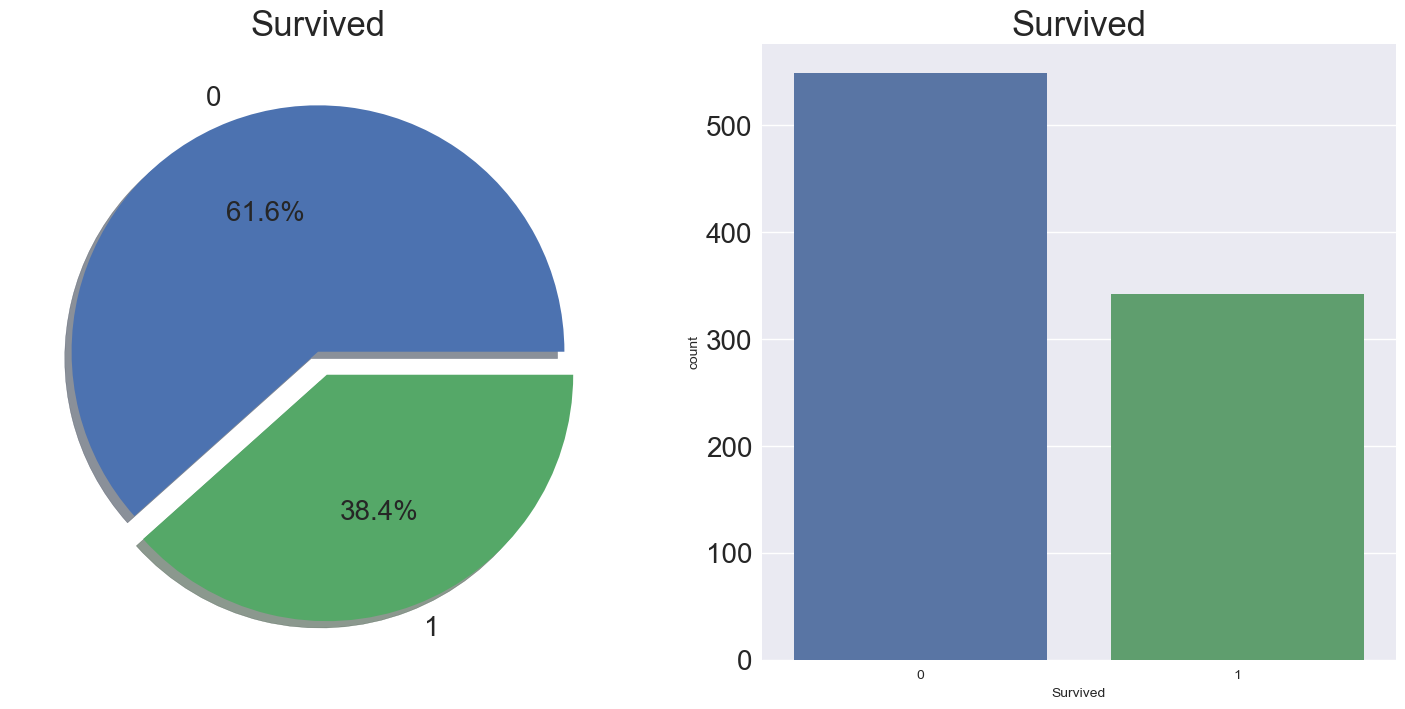

In [10]:
f, ax = plt.subplots(1,2, figsize=(18,8))

#파이차트
data['Survived'].value_counts().plot.pie(explode=[0, 0.1],
                                         #Survived 0은 중심에서 0%만큼, 1은 10%만큼 벗어나게
                                         autopct='%1.1f%%',
                                         ## 백분율을 소수점 앞 한자리 소수점 아래 한자리까지 %로 표시
                                         ax=ax[0],
                                         # 0번째 위치
                                         shadow=True,
                                         fontsize=20)

#제목 설정
ax[0].set_title('Survived')
ax[0].set_ylabel('')

#카운트플랏
sns.countplot(x='Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

## 생존자 성별(Bar/CountPlot)

In [11]:
# 0: 사망, 1: 생존
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

# 살펴보기

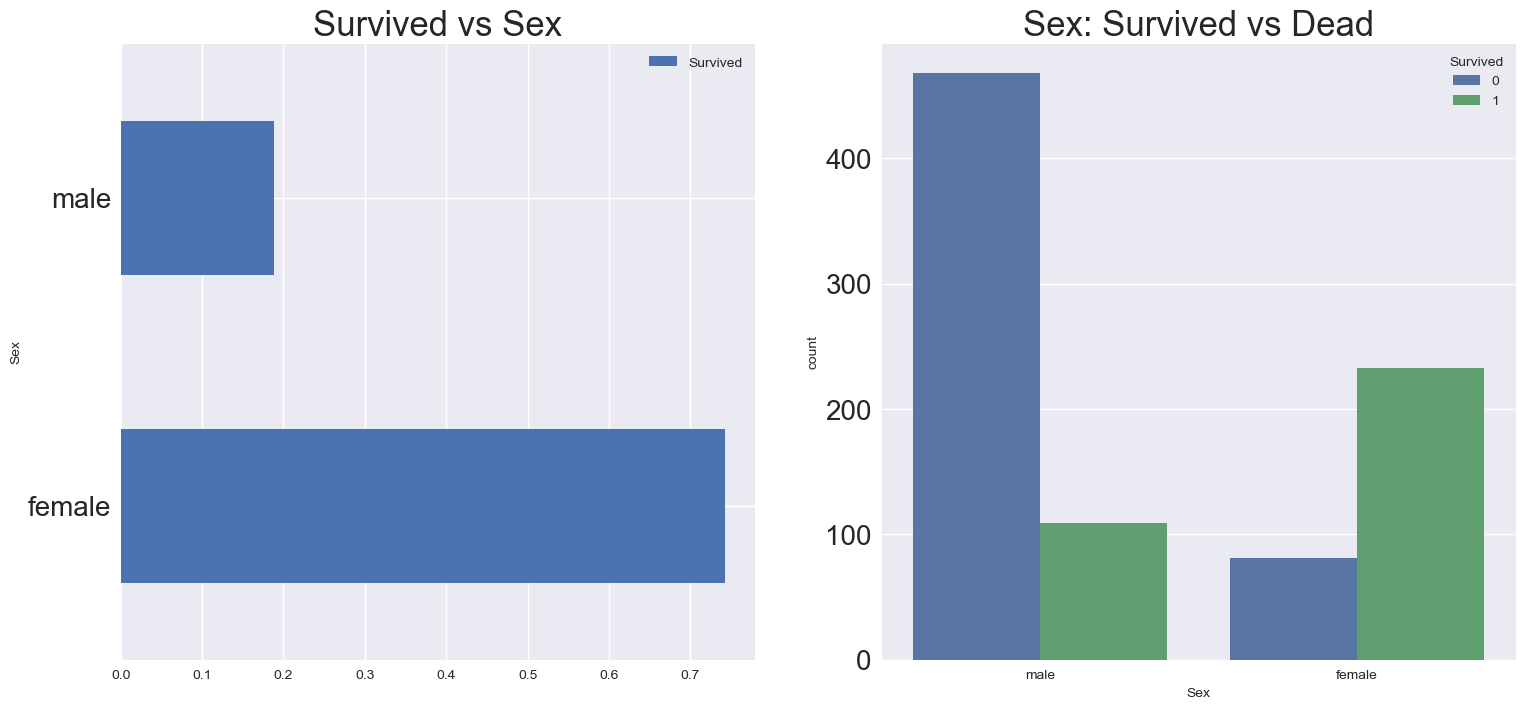

In [12]:
f, ax = plt.subplots(1,2, figsize=(18,8))

#막대 그래프
#Sex별 탑승객 수를 수평 막대그래프로
data[['Sex','Survived']].groupby(['Sex']).mean().plot.barh(ax=ax[0])
#그래프 위치 설정, 0번재 row, 0번째 col
ax[0].set_title('Survived vs Sex')

#카운트플랏
sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1])
#Sex내에서 Survived 여부를 나눠서 plot
ax[1].set_title('Sex: Survived vs Dead')

#그래프로 잘 보여주는 것이 중요!
plt.show()

In [13]:
#크로스태블릿
#margins=Ture -> All 출력
pd.crosstab(data.Pclass,
           data.Survived, margins=True).style.background_gradient(
                cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


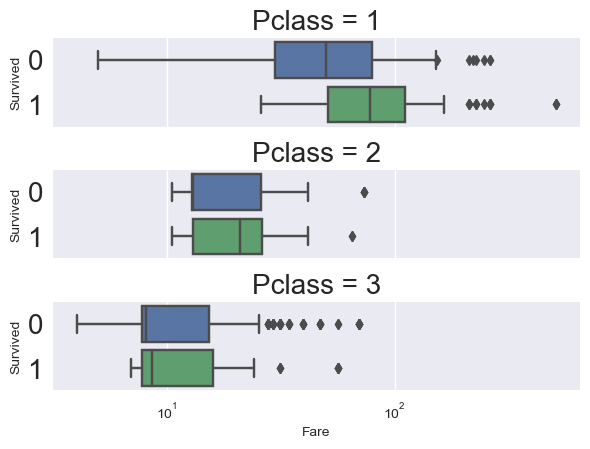

In [14]:
plot = sns.catplot(x='Fare', y='Survived', row='Pclass',
                   #box plot을 수평적으로
                  kind='box', orient='h', height=1.5, aspect=4,
                   #요금이 0초과인 데이터만
                  data=data.query('Fare>0'))
# 다른 사람들이 처음봐도 잘 알 수 있게
plot.set(xscale='log');

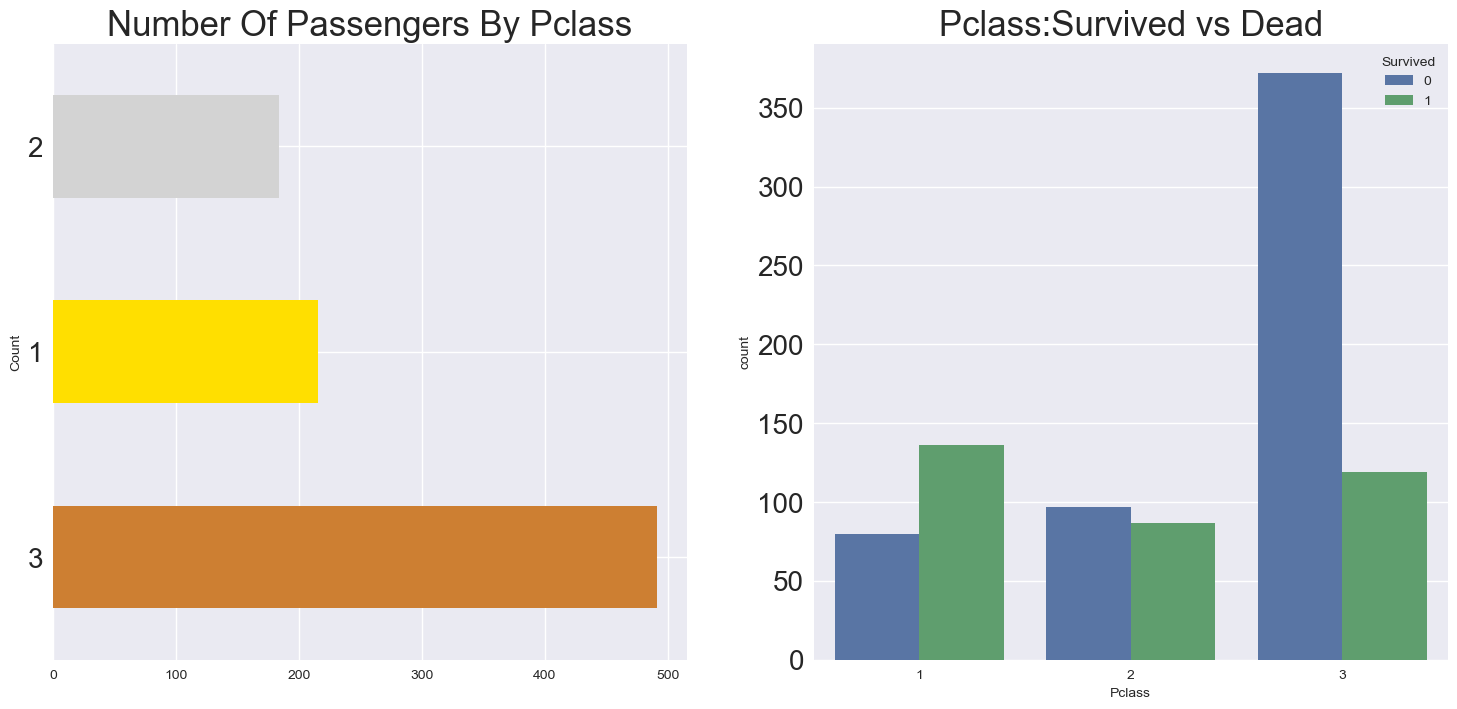

In [15]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

#가로형 막대 그래프: barh
data['Pclass'].value_counts().plot.barh(
    ## Pclass별 탑승객 수, color 지정
    color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0]) 
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

# 카운트 플랏
# Pclass별 Survived를 나눠 plot
sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [16]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='winter_r')

# 살펴보기 3

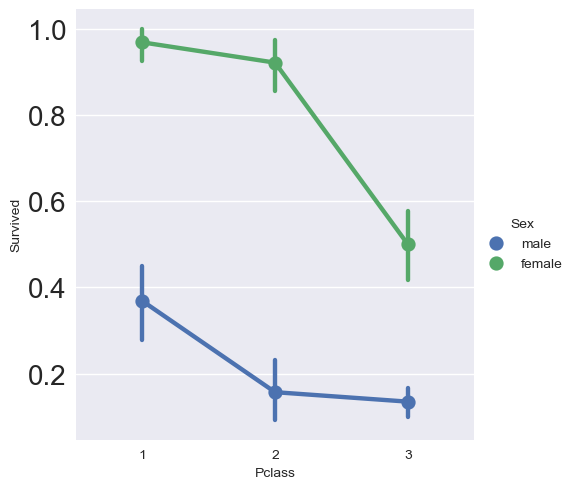

In [17]:
#팩터플랏
#Sex별로 pclass의 변화에 따른 survived 변화
#catplot으로 facotrplot 그리기
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=data)
plt.show()

## Age: Continuous Featur (Violint/FactorPlot/Histogram)

In [18]:
#최대값
print('Oldest Passenger was of:', data['Age'].max(), 'Years') 
#최소값
print('Youngest Passenger was of:', data['Age'].min(), 'Years') 
#평균
print('Average Age on the ship:', data['Age'].mean(), 'Years') 

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


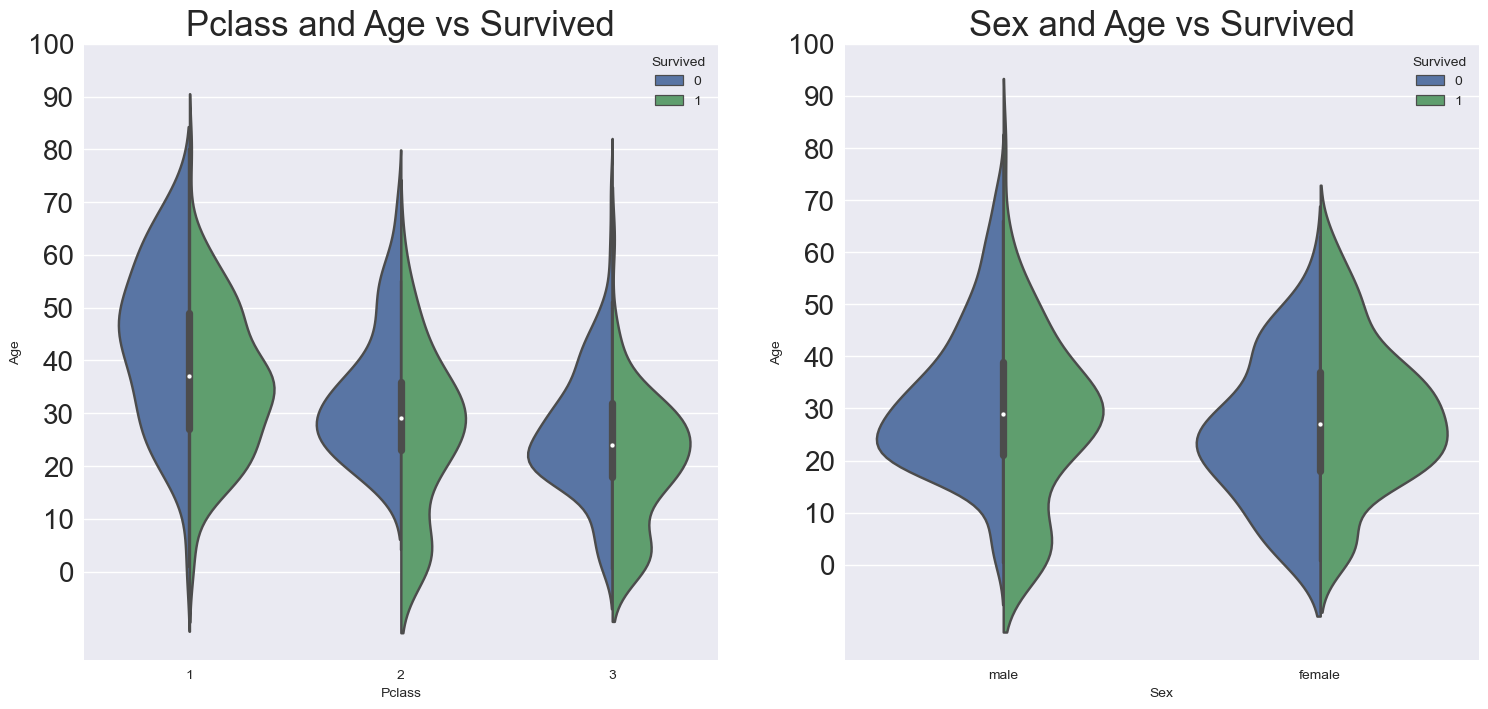

In [19]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

#바이올린 플랏
# split: hue에 맞춰서, 그래프가 겹치지 않게 분리해줌
sns.violinplot(x= 'Pclass',
               y='Age',
               hue='Survived',
               data=data,
               split=True, 
               ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

#바이올린 플랏
sns.violinplot(x= 'Sex', y='Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [20]:
#salutation 추출
#결측치를 떼어내서, 주어진 것만 이용하는게 아니라 새로 만들어서도 가능
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [21]:
# Initials을 Sex와 함께 확인
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(
    cmap='autumn')  

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [22]:
data['Initial'].replace([
    'Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col',
    'Rev', 'Capt', 'Sir', 'Don'
], [
    'Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other',
    'Other', 'Mr', 'Mr', 'Mr'
],
                        inplace=True)

In [23]:
# Initial별 평균 나이 확인
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

## age 결측값 채우기

In [24]:
# 결측값을 Initial별 평균값으로 대체
data.loc[(data.Age.isnull()) & (data.Initial == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial == 'Other'), 'Age'] = 46

In [25]:
# 결측값 유무 확인
data.Age.isnull().any()

False

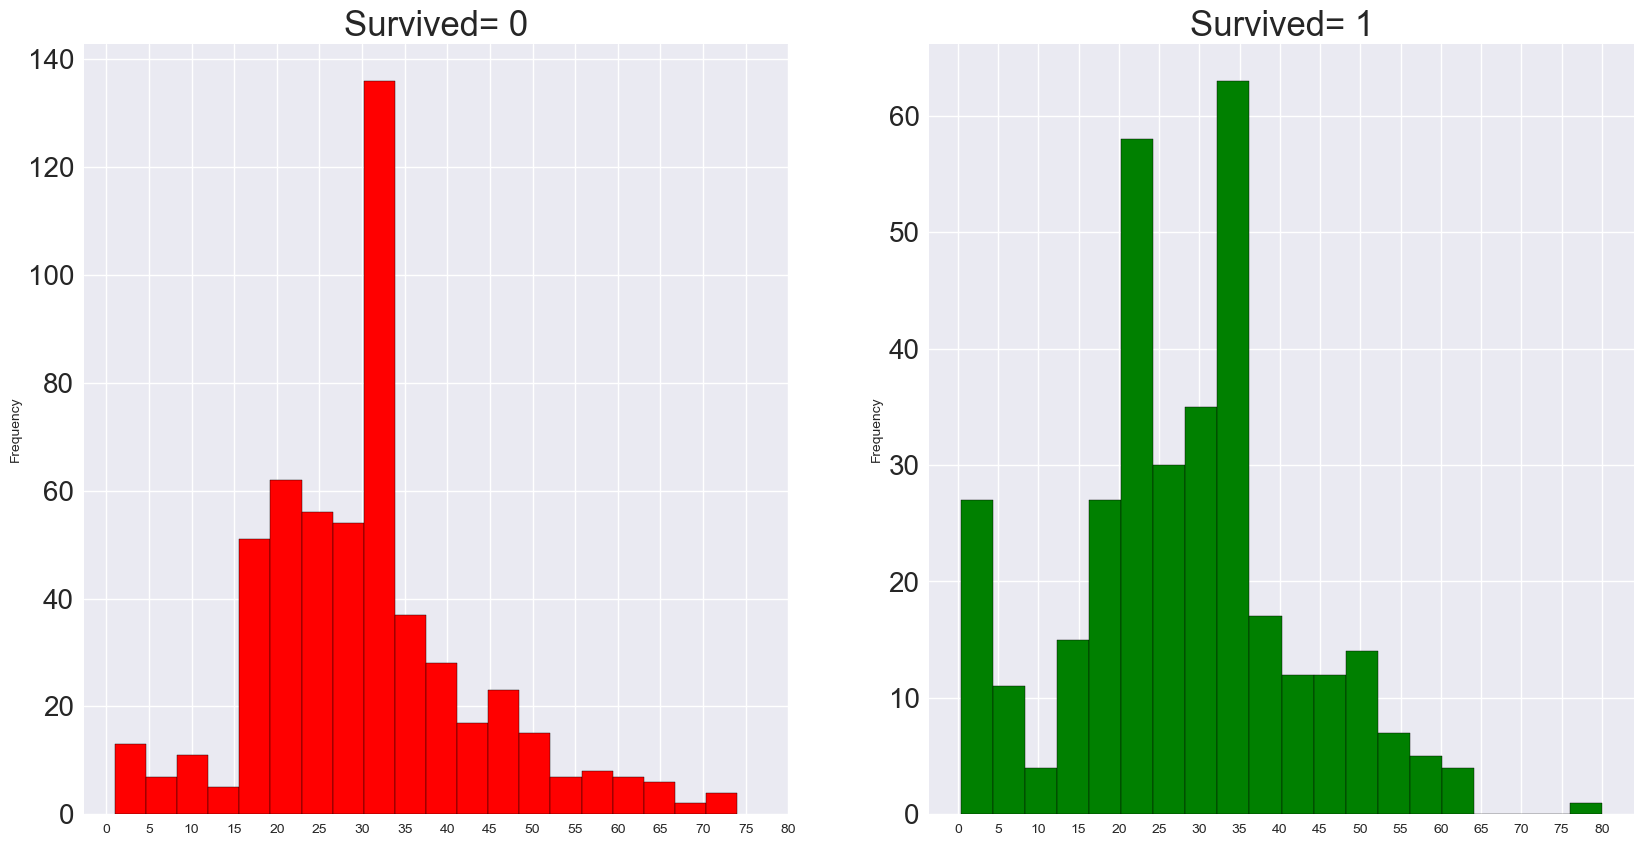

In [26]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

#히스토그램
data[data['Survived'] == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')

ax[0].set_title('Survived= 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

#히스토그램
data[data['Survived'] == 1].Age.plot.hist(ax=ax[1],
                                          color='green',
                                          bins=20,
                                          edgecolor='black')
ax[1].set_title('Survived= 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)

plt.show()

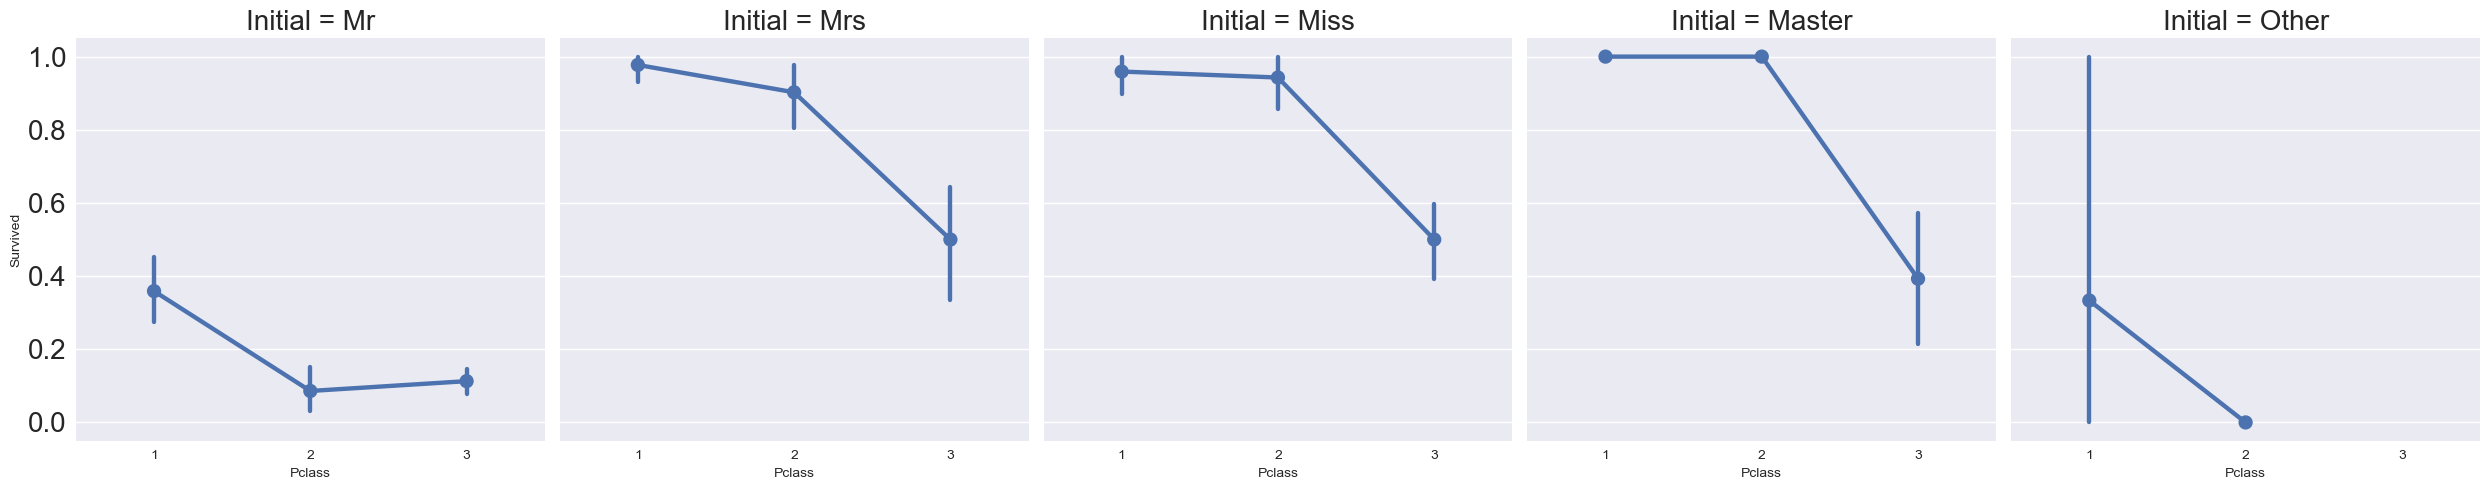

In [27]:
sns.catplot(x='Pclass', y='Survived', col='Initial', data=data, kind = 'point')## Initial별 pclass, survived plot
plt.show()

## Embarked: Categorical Value (Facotr/CountPlot)

In [28]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='winter_r')

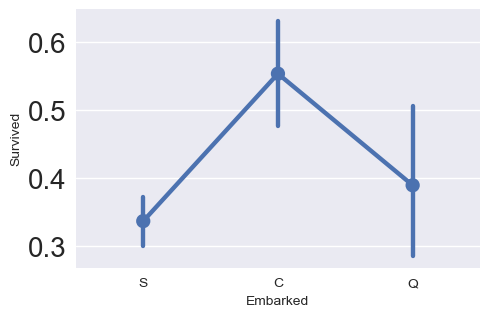

In [29]:
#팩터플랏
##먼저 그래프를 그린 후
sns.catplot(x='Embarked', y='Survived', data=data, kind='point') 
#현재 figure에 대해서
fig = plt.gcf() 
#figure 사이즈 설정
fig.set_size_inches(5, 3) 
plt.show()

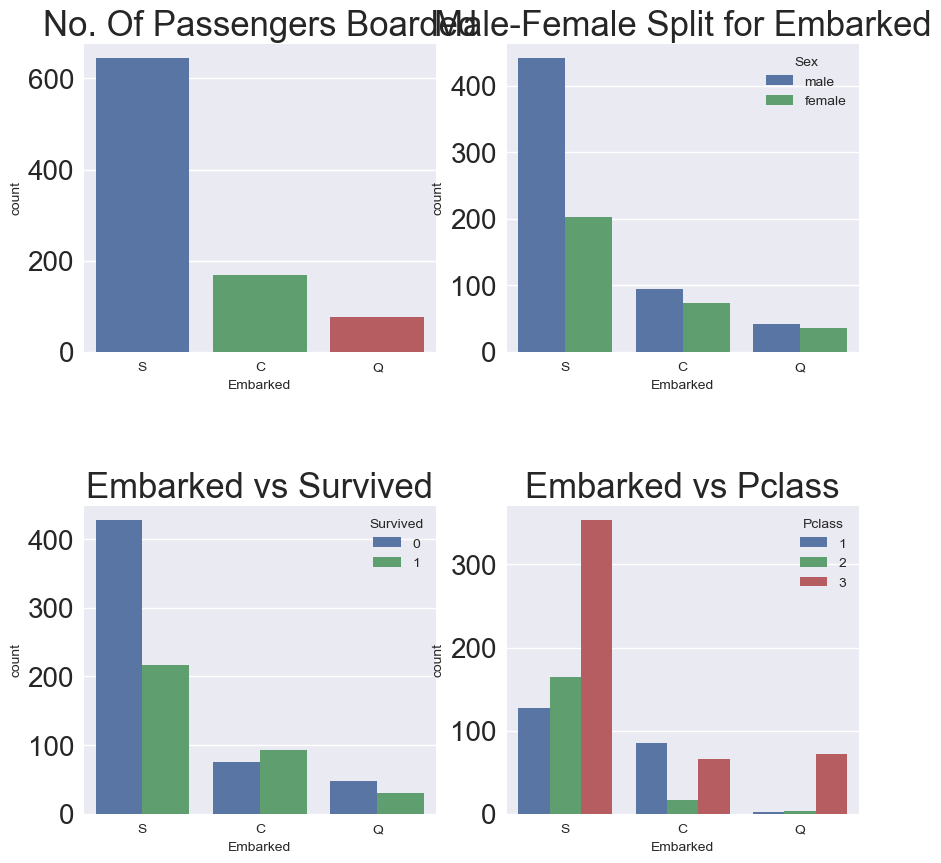

In [30]:
f, ax = plt.subplots(2, 2, figsize=(10, 10))

#카운트플랏
sns.countplot(x= 'Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')

sns.countplot(x= 'Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')

sns.countplot(x='Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

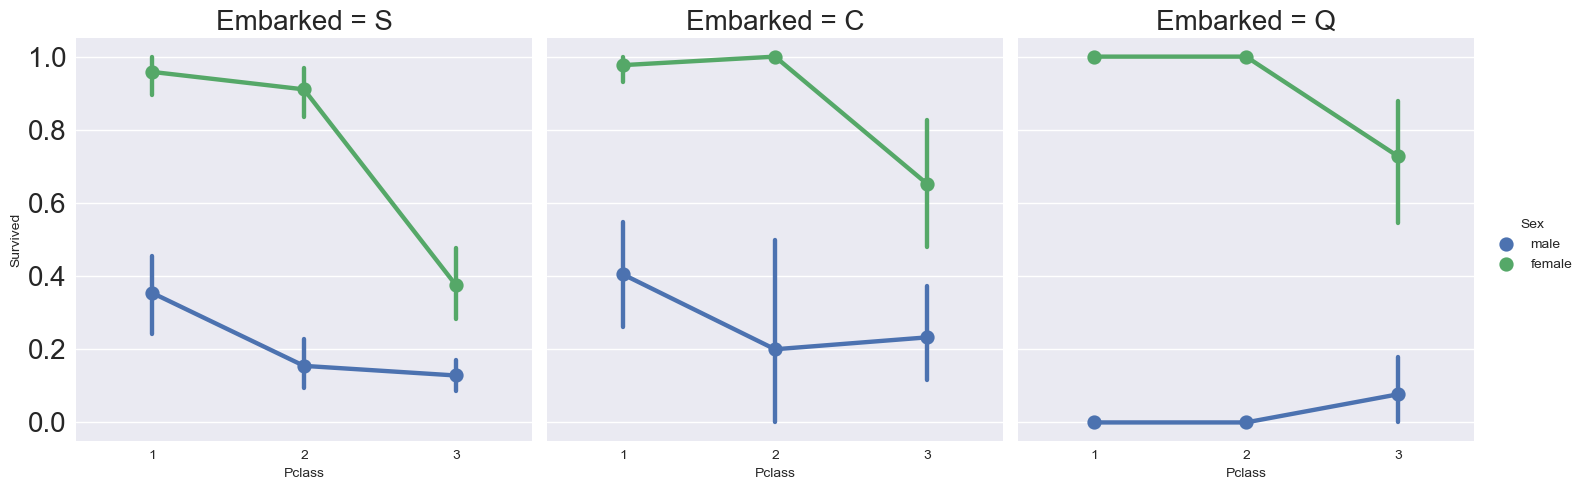

In [31]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=data,kind='point')
plt.show()

## Embarked 결측값 채우기

In [32]:
data['Embarked'].fillna('S',inplace=True)

In [33]:
data.Embarked.isnull().any()

False

## SibSp: Discrete Feature (Bar/FactorPlot)

In [34]:
pd.crosstab([data.SibSp],[data.Survived]).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


Text(0.5, 1.0, 'SibSp vs Survived')

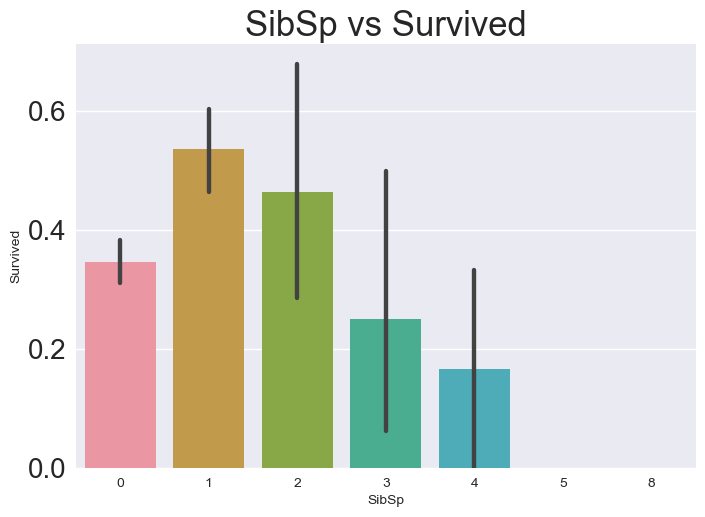

In [35]:
sns.barplot(x='SibSp', y='Survived', data=data)
plt.title('SibSp vs Survived')

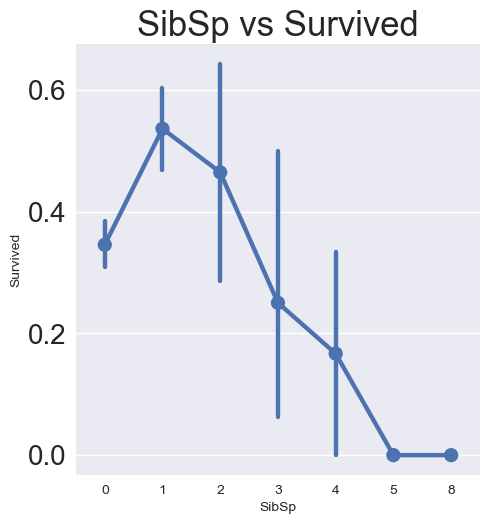

In [36]:
sns.catplot(x='SibSp', y='Survived', data=data, kind='point')
plt.title('SibSp vs Survived')
plt.show()

In [37]:
pd.crosstab([data.SibSp], data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


## Parch(Bar/FactorPlot)

In [38]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='spring_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


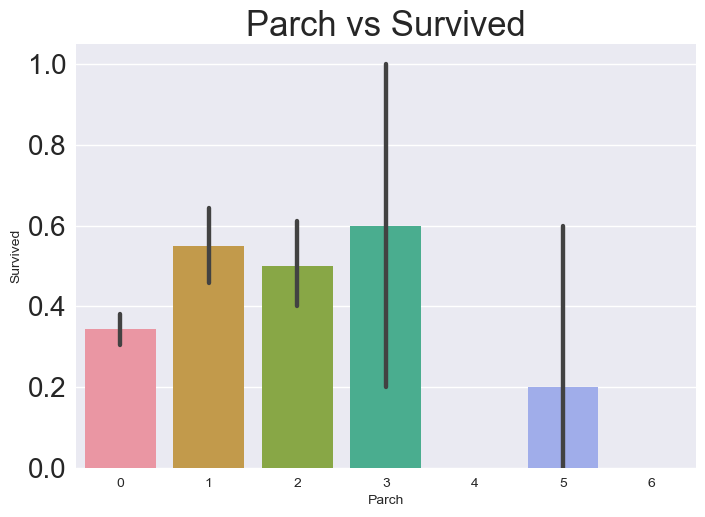

In [39]:
sns.barplot(x='Parch', y='Survived', data=data)
plt.title('Parch vs Survived')
plt.show()

## Fare: Continuous Feature(Cat/DistPlot)

In [40]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


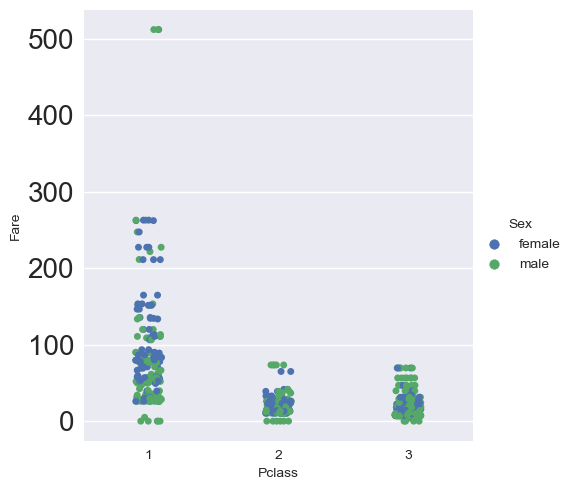

In [41]:
sns.catplot(x='Pclass', y='Fare', hue='Sex', data=data)

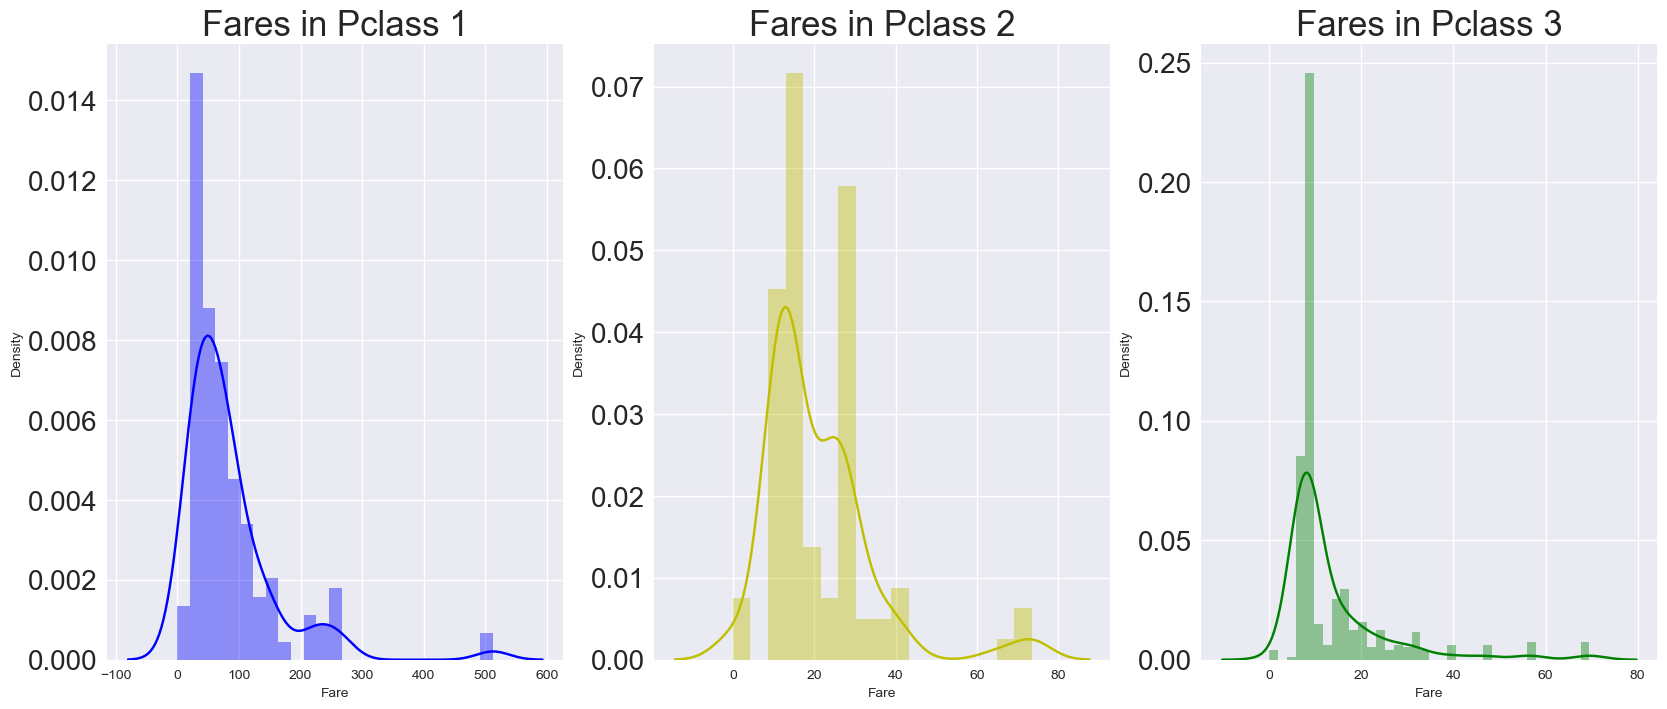

In [42]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# dist plot
sns.distplot(data[data['Pclass'] == 1].Fare, ax=ax[0], color='b')
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass'] == 2].Fare, ax=ax[1], color='y')
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass'] == 3].Fare, ax=ax[2], color='g')
ax[2].set_title('Fares in Pclass 3')

plt.show()
#y축 척도가 다른데, 이것도 scaling의 중요성을 보여주는 것임

## Correlation Between The Features(heatmap)

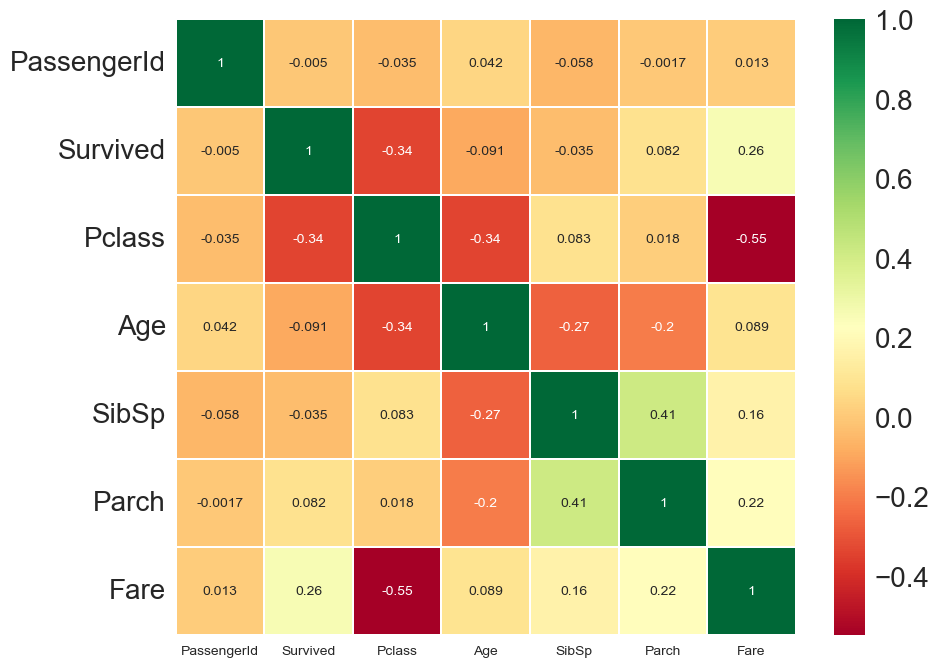

In [43]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

## Age_band

In [44]:
data['Age_band']=0
data.loc[data['Age']<=16, 'Age_band']=0
data.loc[(data['Age']>16) & (data['Age']<=32) , 'Age_band']=0
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [45]:
data['Age_band'].value_counts().to_frame()

,Age_band
0,486
2,325
3,69
4,11


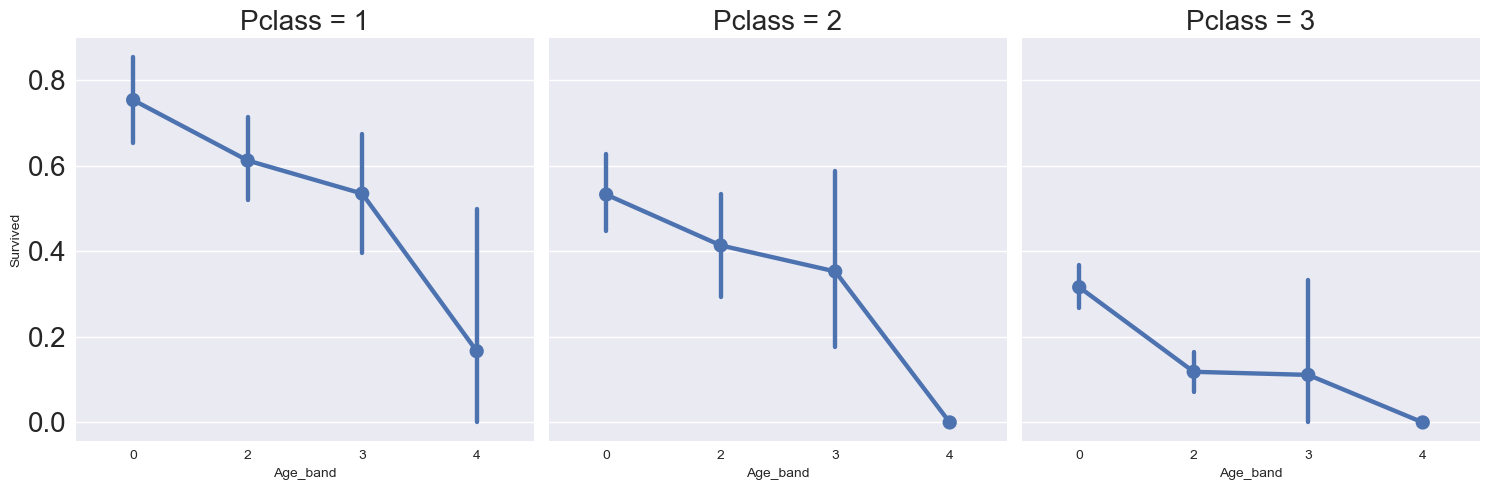

In [46]:
sns.catplot(x='Age_band', y='Survived', data=data, col='Pclass', kind='point')
plt.show()

## Family_Size and Alone

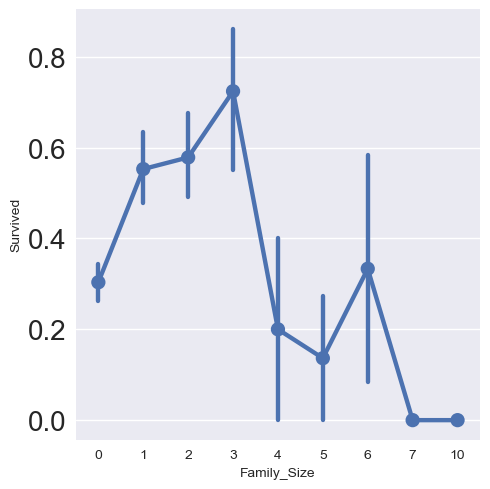

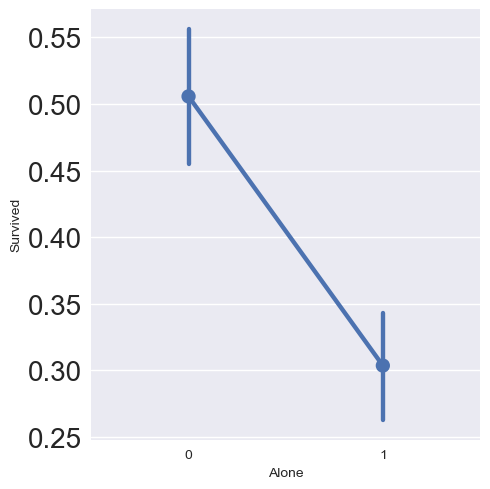

In [47]:
#family size
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']  
data['Alone'] = 0

#Alone
data.loc[data.Family_Size == 0, 'Alone'] = 1  

sns.catplot(x='Family_Size', y='Survived', data=data, ax=ax[0],kind='point')
ax[0].set_title('Family_Size vs Survived')

sns.catplot(x='Alone', y='Survived', data=data, ax=ax[1],kind='point')
ax[1].set_title('Alone vs Survived')

plt.show()

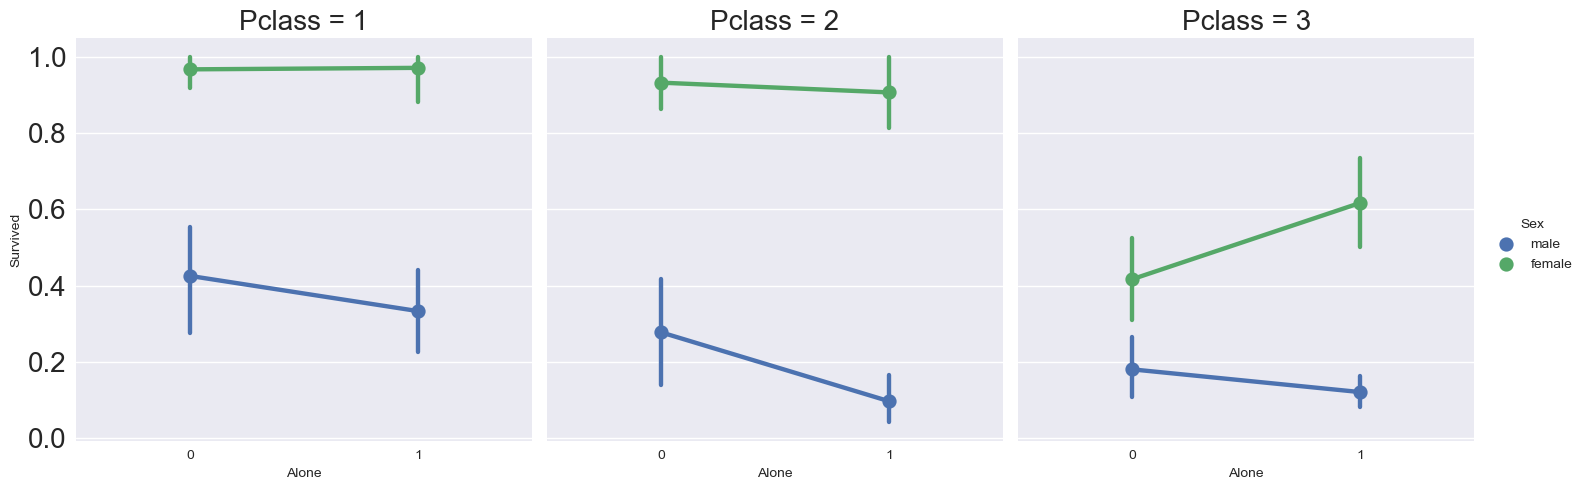

In [48]:
sns.catplot(x='Alone', y='Survived', data=data, hue='Sex', col='Pclass',kind='point')
plt.show()

## Fare_Range

In [49]:
#네개로 나눠주겠다
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby('Fare_Range')['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [50]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513), 'Fare_cat'] = 3

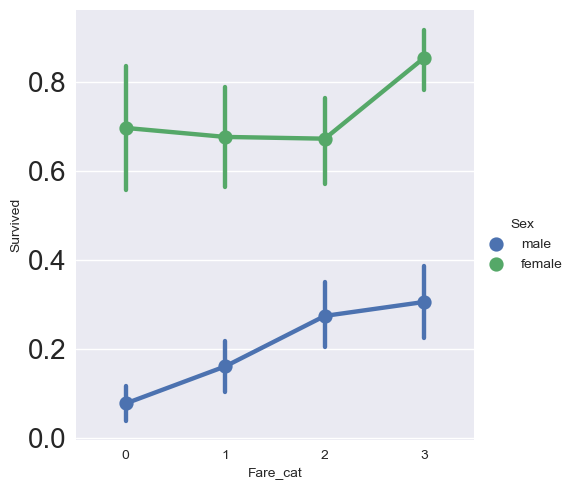

In [51]:
sns.catplot(x='Fare_cat', y='Survived', data=data, hue='Sex',kind='point')
plt.show()

## Converting String Values into Numeric

In [52]:
#머신러닝은 숫자값만 넣을 수 있어서!
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)

In [53]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Initial', 'Age_band',
       'Family_Size', 'Alone', 'Fare_Range', 'Fare_cat'],
      dtype='object')

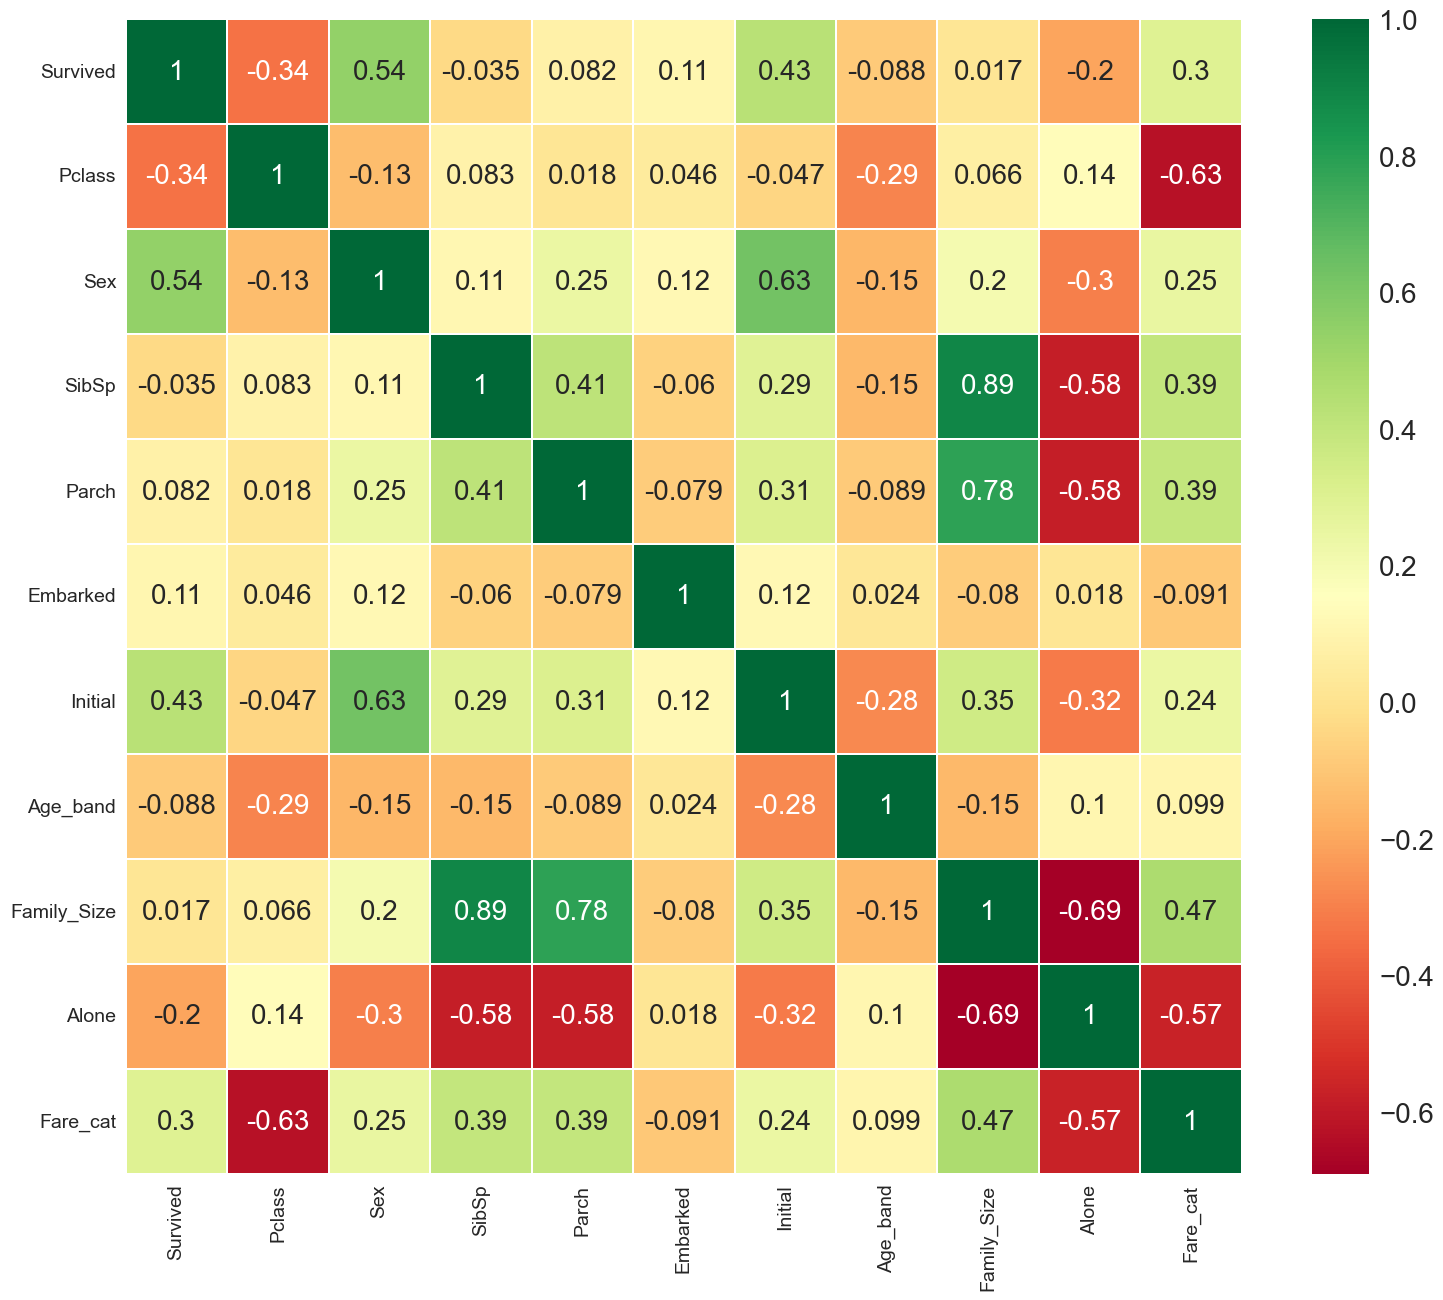

In [54]:
data.drop(
    ['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)

## data의 feature에서 correlation heatmap
sns.heatmap(data.corr(), 
            annot=True,
            cmap='RdYlGn',
            linewidths=0.2,
            annot_kws={'size': 20})

fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Line Plot

In [55]:
df=pd.DataFrame(np.random.randn(10,4).cumsum(axis=0), columns=['A','B','C','D'], index=np.arange(0,100,10))
df

,A,B,C,D
0,1.233016,0.124863,0.439023,0.706939
10,0.639106,0.517752,-1.048392,0.851439
20,-0.352899,0.889677,-0.459779,0.007052
30,0.705739,-0.071307,-1.349805,1.891515
40,0.360516,-0.360587,-0.035783,1.207611
50,0.132130,-0.999828,0.413527,0.840002
60,-2.241110,-1.675413,-0.766844,2.274744
70,-2.313001,-2.837352,-0.164879,2.984997
80,-3.175644,-1.162968,-0.917832,5.399469
90,-3.195856,1.177806,-3.121737,6.090555


<Axes: >

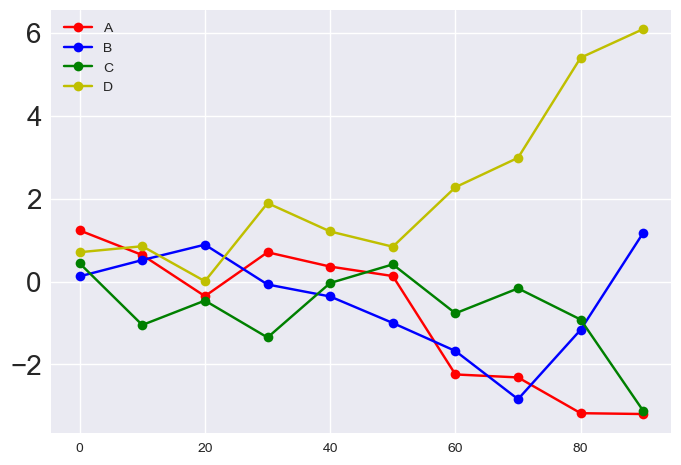

In [56]:
#그래프를 그리는 방식은 많고, 자기랑 맞는 방식을 쓰면됨
df.plot(marker='o', color=['r','b','g','y'])

## Iris dataset

In [57]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Scatter Plot

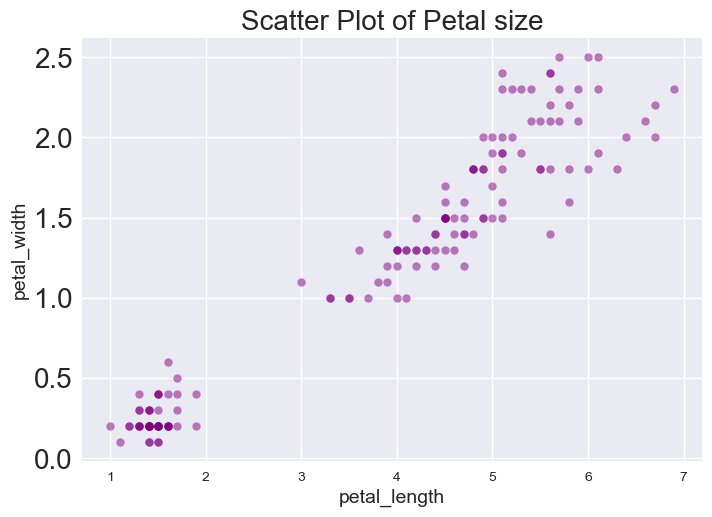

In [58]:
plt.plot('petal_length', 'petal_width',  data=iris, linestyle='none', marker='o', markersize=6,color='purple', alpha=0.5)

plt.title('Scatter Plot of Petal size', fontsize=20)
plt.xlabel('petal_length', fontsize=14)
plt.ylabel('petal_width', fontsize=14)

plt.show()

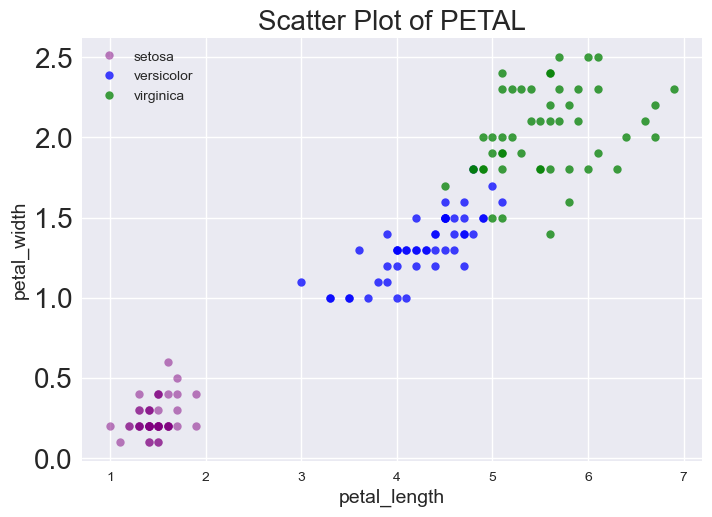

In [59]:
plt.plot('petal_length',  # x
         'petal_width',  # y
         data=iris[iris['species']=='setosa'],
         linestyle='none', 
         marker='o', 
         markersize=6,
         color='purple', 
         alpha=0.5)
plt.plot('petal_length',  # x
         'petal_width',  # y
         data=iris[iris['species']=='versicolor'],
         linestyle='none', 
         marker='o', 
         markersize=6,
         color='blue', 
         alpha=0.75)
plt.plot('petal_length',  # x
         'petal_width',  # y
         data=iris[iris['species']=='virginica'],
         linestyle='none', 
         marker='o', 
         markersize=6,
         color='green', 
         alpha=0.75)
plt.title('Scatter Plot of PETAL', fontsize=20)
plt.xlabel('petal_length', fontsize=14)
plt.ylabel('petal_width', fontsize=14)
plt.legend(['setosa','versicolor', 'virginica'])
plt.show()

## Pair Plot

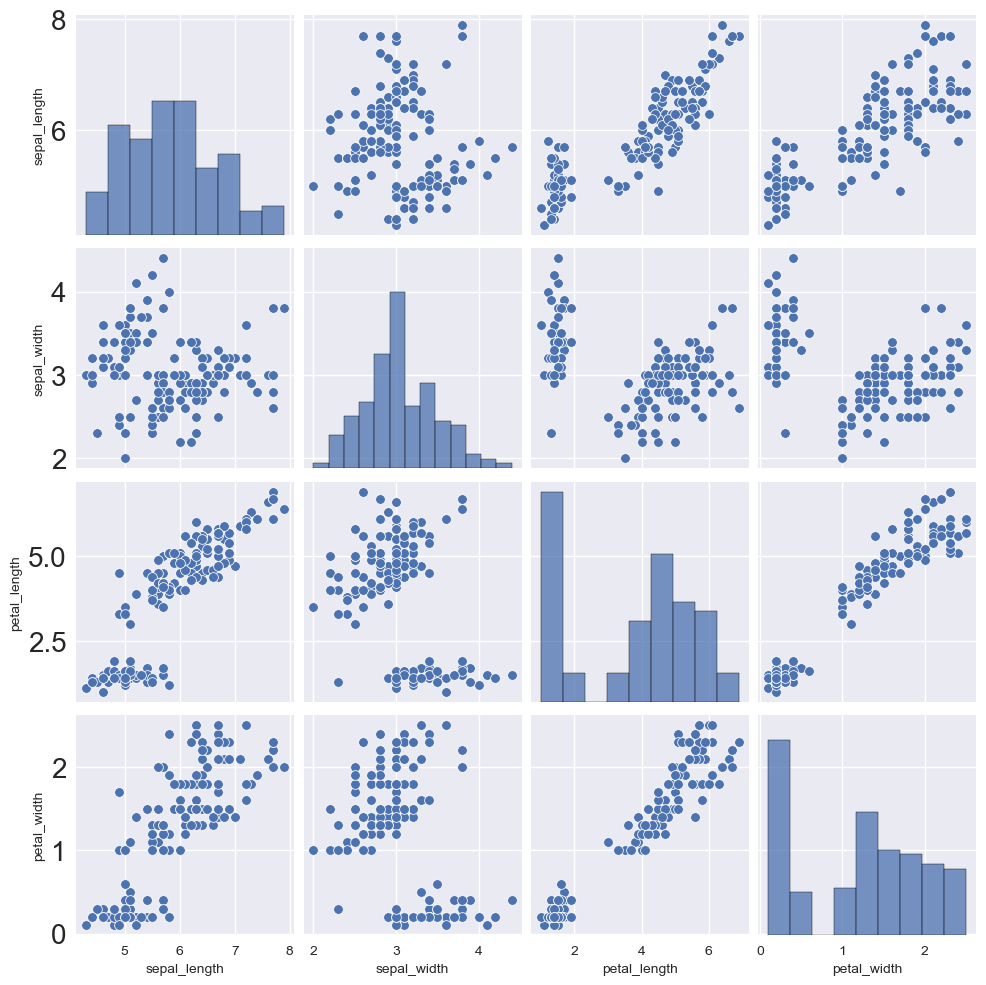

In [60]:
sns.pairplot(iris)

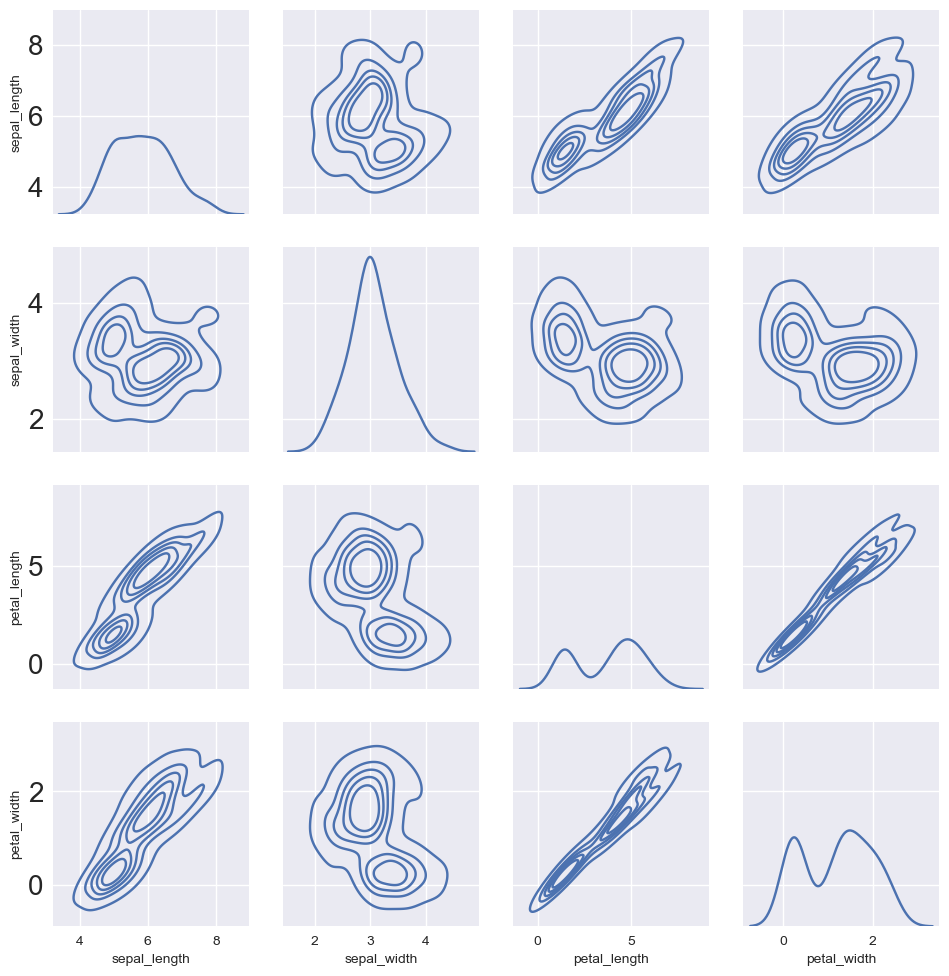

In [61]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

## 데이터 전처리 Scaling 시각화

In [62]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [63]:
import numpy as np

fish_data= np.column_stack((fish_length, fish_weight))
fish_target= np.concatenate((np.ones(35), np.zeros(14)))
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

Text(0, 0.5, 'weight')

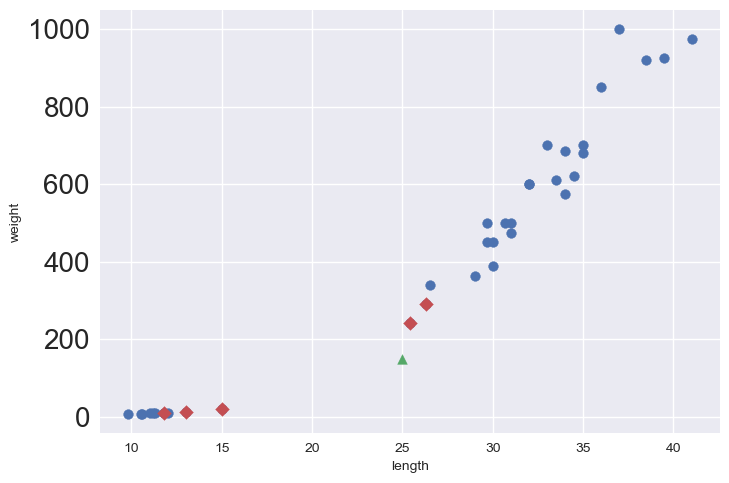

In [64]:
distances, indexes = kn.kneighbors([[25,150]])

import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')

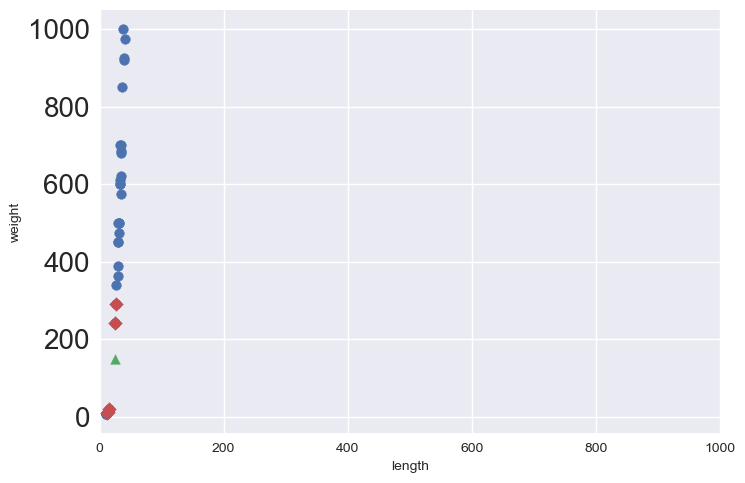

In [65]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0,1000))
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [66]:
mean=np.mean(train_input, axis=0)
std=np.std(train_input, axis=0)

In [67]:
print(mean,std)

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


In [68]:
train_scaled=(train_input-mean)/std

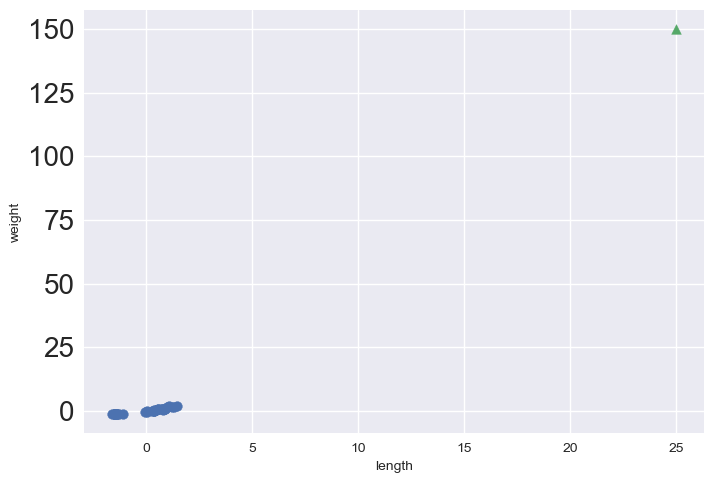

In [69]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel("length")
plt.ylabel('weight')
plt.show()

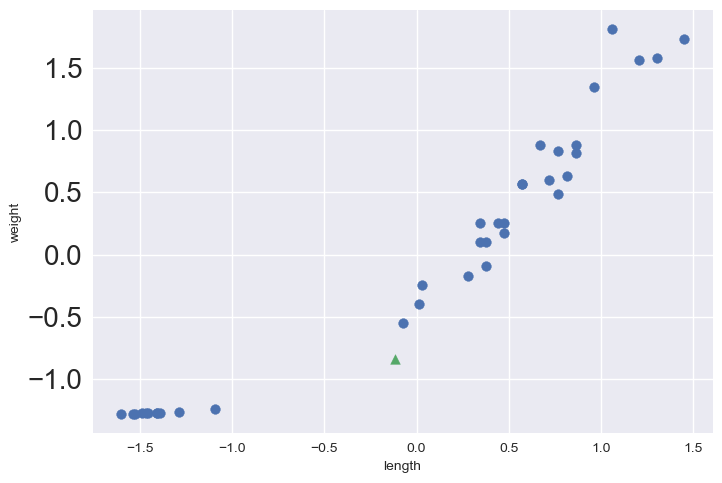

In [70]:
new=([25,150]-mean)/std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 실습

In [71]:
data2 = pd.read_csv('./train.csv')
data2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
data2['fare_band'] = 0
data2.loc[data2['Fare'] <= 200, 'fare_band'] = 0
data2.loc[(data2['Fare'] > 0) & (data2['Fare'] <= 200), 'fare_band'] = 1
data2.loc[(data2['Fare'] > 200) & (data2['Fare'] <= 400), 'fare_band'] = 2
data2.loc[(data2['Fare'] > 400) & (data2['Fare'] <= 600), 'fare_band'] = 3
data2.loc[data2['Fare'] > 600, 'fare_band'] = 4
data2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


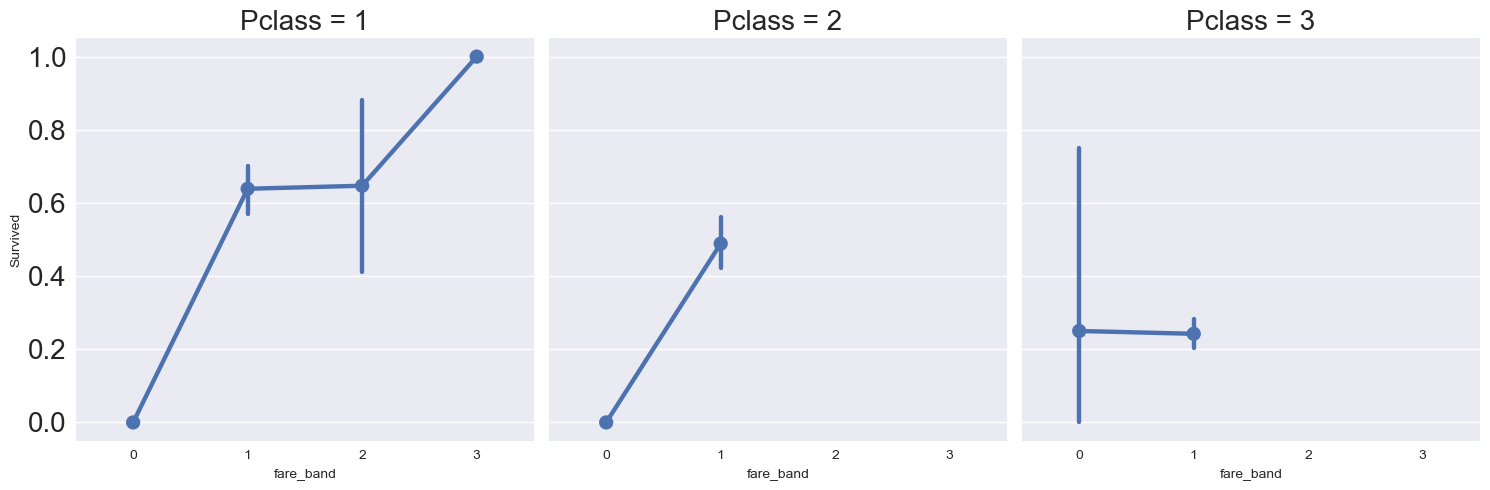

In [73]:
sns.catplot(x='fare_band', y='Survived', data=data2, col = 'Pclass', kind='point')

2) Embarked 컬럼 내의 각 위치에서 내린 승객의 비율을 나타내는 PieChart와 Pclass 별 각각 살아남은 사람과 살아남지 못한 사람의 수를 나타내주는 Countplot을 함께 그려보세요.

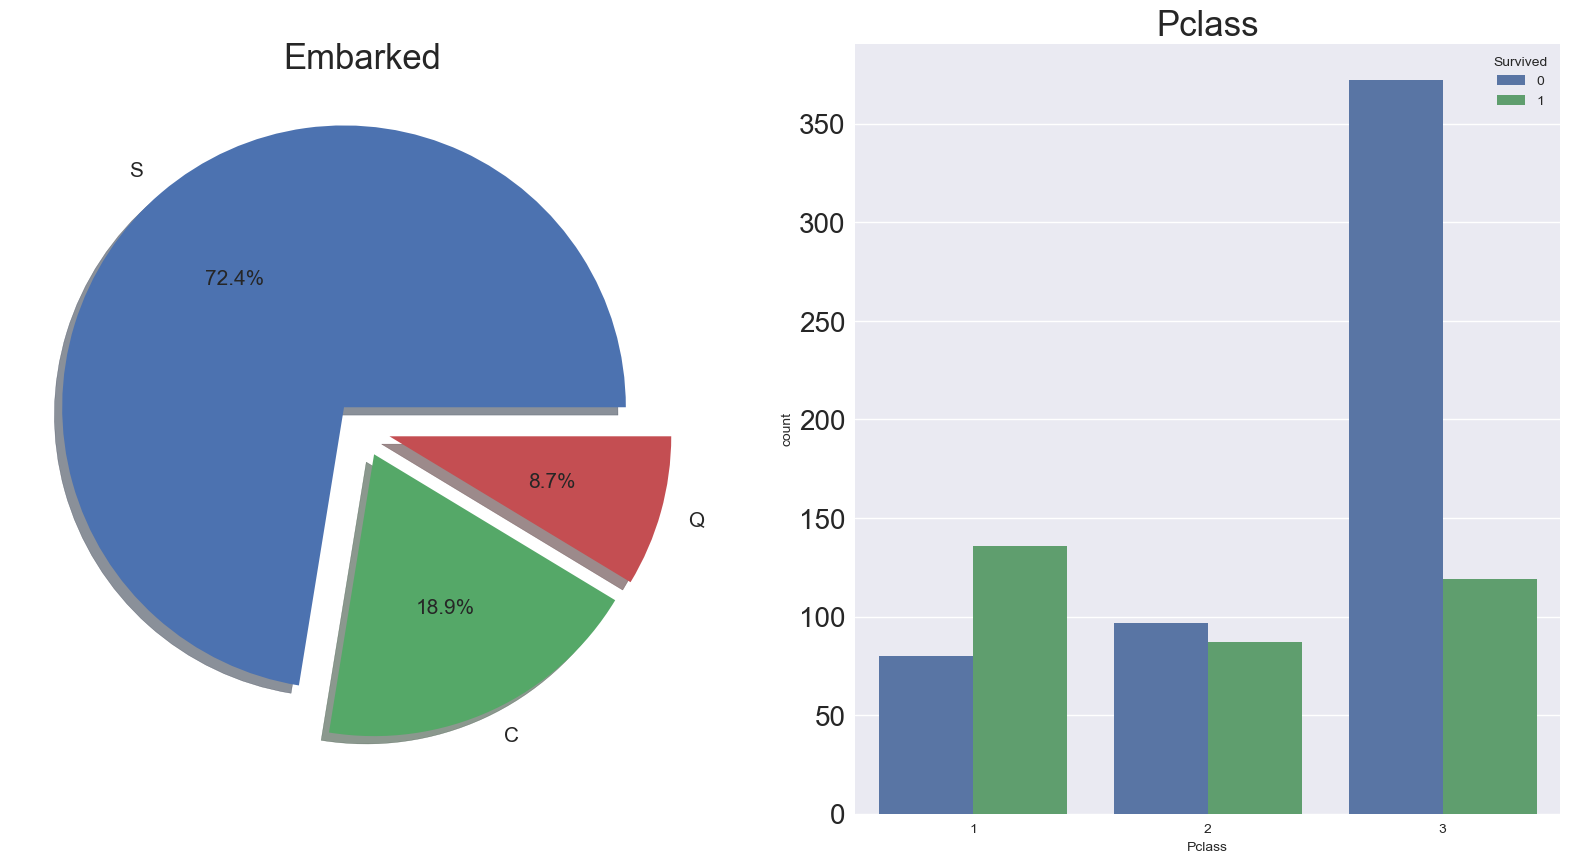

In [77]:
f, ax = plt.subplots(1,2, figsize=(20,10))

#파이차트
data2['Embarked'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,fontsize=15,explode=[0.1,0.1,0.1])
ax[0].set_title('Embarked')
ax[0].set_ylabel('')

#카운트플랏
sns.countplot(x='Pclass',hue='Survived', data=data2,ax=ax[1])
ax[1].set_title('Pclass')

plt.show()

3) 성별 별로 Embarked에 따른 Survived의 변화를 factorplot을 통해 나타내보세요.

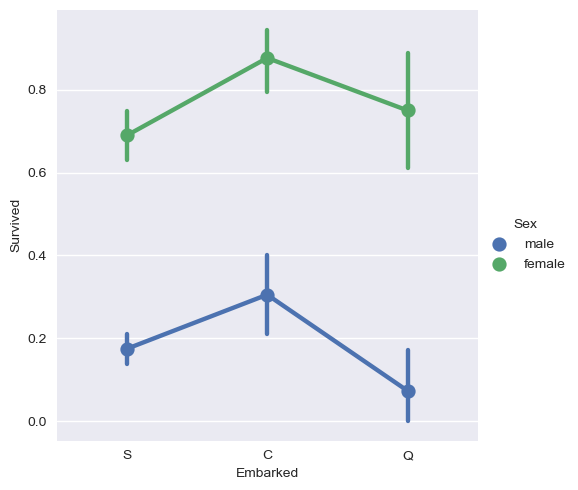

In [310]:
sns.catplot(x='Embarked', y='Survived', hue='Sex', kind='point', data=data2)
plt.show()